In [3]:
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 单变量线性回归

## 数据可视化

In [ ]:
path = "exp1data1.txt"
data = pd.read_csv(path, header=None, names=["Population", "Profit"])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


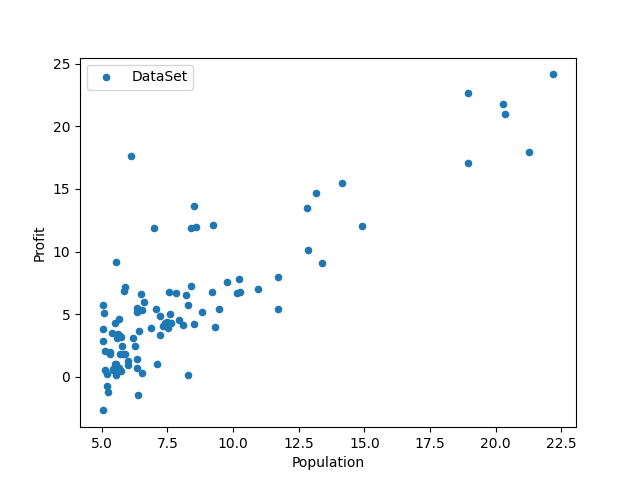

In [ ]:
data.plot(kind="scatter", x="Population", y="Profit", label="DataSet")
plt.show()

## 创建数据集

In [ ]:
data.insert(0, "Ones", 1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [ ]:
X = data.iloc[:, 0:-1]
Y = data.iloc[:, -1]
Y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64

In [ ]:
X = np.matrix(X.values)
Y = np.matrix(Y.values).reshape(97, 1)

In [ ]:
X.shape, Y.shape

((97, 2), (97, 1))

## 损失函数

In [ ]:
def costFunc(X, theta, Y):
    inner = np.power(((X * theta) - Y), 2)
    return np.sum(inner) / (2 * len(X))
theta =np.zeros((2, 1))

In [ ]:
X.shape, theta.shape, Y.shape

((97, 2), (2, 1), (97, 1))

In [ ]:
cost_init = costFunc(X, theta, Y)
print(cost_init)

32.072733877455676


## 梯度下降函数

In [ ]:
def gradientDecent(X, theta, Y, alpha, iters):
    costs = []
    for i in range(iters):
        theta = theta - (X.T  * (X * theta - Y)) * alpha / len(X)
        cost = costFunc(X, theta, Y)
        costs.append(cost)
    return theta, costs

In [ ]:
alpha = 0.02
iters = 1000
theta =np.zeros((2, 1))
theta, costs = gradientDecent(X, theta, Y, alpha, iters)

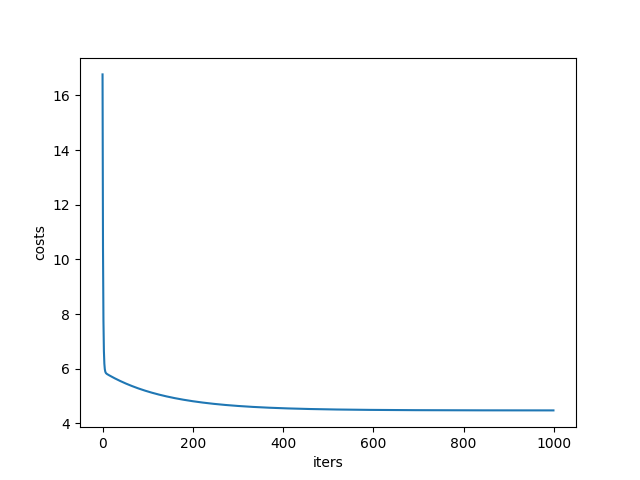

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(iters), costs)
ax.set(xlabel="iters", ylabel="costs")
plt.show()

## 可视化拟合函数

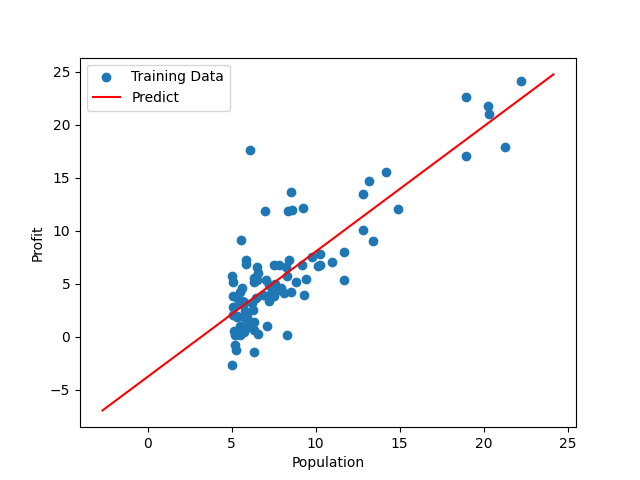

In [ ]:
x = np.linspace(Y.min(), Y.max(), 100)
y_ = theta[0, 0] + theta[1, 0] * x

fig, ax = plt.subplots()
ax.scatter(np.array(X)[:,1], np.array(Y),label="Training Data")
ax.plot(x, y_, "r", label="Predict")
ax.legend()
ax.set(xlabel="Population", ylabel="Profit")
plt.show()